In [2]:
# Identification
# assign the following string values
yourNameSurname='Patryk Choma' # e.g.,  yourNameSurname='Mario Rossi'
yourMatricolaNumber='1617474' # e.g.,  yourMatricolaNumber='12345678'
yourStudentEMAIL='choma.1617474@studenti@studenti.uniroma1.it' # e.g.,  yourStudentEMAIL='rossim.12345678@studenti.uniroma1.it'

# Machine Learning 2020/2021 - Challenge 

#### 1. Mandatory Rules
#### 2. The Dataset
- #### 2.1 Load the dataset
- #### 2.2 Dataset Analysis

#### 3. Classification
- #### 3.1 Preprocessing
- #### 3.2 Model Selection
- #### 3.3 Evaluation

#### 4. Summary


<hr>

## 1. Mandatory Rules (read carefully):
- This year the results of the challenges will count 8/30 of your final score.
- Only one submission is allowed. We will not consider multiple submissions.
- Please remember your solution must be <b>"YOUR SOLUTION"</b>, hence you are requested to deliver your individual answers/arguments/opinions/critics.
- Mail your solution (a <b>jupyter notebook</b>) only to stefano.faralli@unitelmasapienza.it <b>10 days before the date of a written exam (NO EXCEPTIONS)</b> if you miss to deliver your solution you must wait the next (if any) available deadline. 
- The subject of your email must be: "[Challenge_solution] NAME - SURNAME - MATRICOLA".
- Double check the subject of your email and the attachments.
- In case you want to compress the attachment, <b>USE ONLY STANDARD ZIP compression</b> (NO RAR,7Z etc..).
- <b>Please sumbit ONLY the notebook with SAVED OUTPUTS!</b>.
- Your solution might be considered as the "copy" of others solutions, in that specific case the resulting score for all involved students will be 0/8.
- Then read carefully all the part of the jupyter notebook and fill all fields.
- <b>solutions (and correspondig points) are evaluated mainly on your thoughts/comments/opinions</b>.  
- If you have questions <b>Don't write "personal" emails</b> to Stefano Faralli, instead <b>use our google group</b>.
- A solution having a summary discussion with less than 500 words is evaluated with 0 points.

<hr>

## 2. The Dataset (up to 1/8 points)
<img width='400' src='videogames.jpg'/>

- The topic of the challenge is "Video games";
- The dataset consists of one single csv file ("video_games.csv");
- The full description of the dataset is available at: <a href='https://corgis-edu.github.io//corgis/csv/video_games/'>github project page</a>;

[1] Cox, Joe. “What makes a blockbuster video game? An empirical analysis of US sales data.” Managerial and Decision Economics 35.3 (2014): 189-198

## 2.1 Load the Dataset (up to 0.2/8 points)
In the following two cells: a code cell and, a markdown cell, where: 
- you write the code to create a pandas DataFrame by loading the "video_games.csv" file.  
- you describe the problems and the solution for loading the same csv file to a numpy datastructure.

In [3]:
import pandas, numpy

df = pandas.read_csv("video_games.csv")
# print(df.info)

dataset = df.to_numpy()
dataset[:5]

array([['Super Mario 64 DS', True, 1, True, True, 'Action', True,
        'Nintendo', True, 85, 4.69, 24.95, 'Nintendo DS', 'E', True,
        2004, 22.716666666666665, 31.9, 24.48333333333333, 57, 14.3,
        29.766666666666666, 35.03333333333333, 30.0, 20,
        22.016666666666666, 24.916666666666668, 29.966666666666665, 25.0,
        16, 18.33333333333333, 14.333333333333334, 18.316666666666663,
        14.5, 21, 9.7],
       ['Lumines: Puzzle Fusion', True, 1, True, True, 'Strategy', True,
        'Ubisoft', True, 89, 0.56, 14.95, 'Sony PSP', 'E', True, 2004,
        10.1, 11.016666666666667, 10.0, 5, 9.516666666666667, 0.0, 0.0,
        0.0, 0, 0.0, 9.75, 9.866666666666667, 9.75, 2, 9.616666666666667,
        10.333333333333334, 11.083333333333334, 10.0, 3,
        9.583333333333334],
       ['WarioWare Touched!', True, 2, True, True,
        'Action,Racing / Driving,Sports', True, 'Nintendo', True, 81,
        0.54, 22.95, 'Nintendo DS', 'E', True, 2004, 4.566666666666666,
  

your answers for 2.1 Load the Dataset 

There seems to be no problem loading the dataframe into a numpy ndarray by using the given method to_numpy().


## 2.2 Dataset Analysis (up to 0.8/8 points)
In the following code cell (feel free to create new cells), remember to comment your code snippets:

1) Print the total number of samples;

2) Print a table with the first 15 samples;

3) Plot the histogram distribution of "Features.Handheld?";

4) Plot the histogram distribution of "Features.Online?";

5) Plot the histogram distribution of "Metadata.Publishers";	

6) Perform feature importance analysis; 

In [4]:
# Number of samples corresponds to the number of rows
print("Number of samples: ", dataset.shape[0])

# Table containing the first 15 samples
print("Table containing the first 15 samples:")
print(df[:15])

# Plot the histograms using matplotlib
import matplotlib.pyplot as plt

# Assign column names to a self-explanatory variable
HANDHELD = "Features.Handheld?"
ONLINE = "Features.Online?"
PUBLISHERS = "Metadata.Publishers"

Number of samples:  1212
Table containing the first 15 samples:
                                      Title  Features.Handheld?  \
0                         Super Mario 64 DS                True   
1                    Lumines: Puzzle Fusion                True   
2                        WarioWare Touched!                True   
3                  Hot Shots Golf: Open Tee                True   
4                              Spider-Man 2                True   
5                The Urbz: Sims in the City                True   
6                               Ridge Racer                True   
7                           Metal Gear Ac!d                True   
8                           Madden NFL 2005                True   
9                               Pokmon Dash                True   
10                         Dynasty Warriors                True   
11                     Feel the Magic XY/XX                True   
12                           Ridge Racer DS                True  

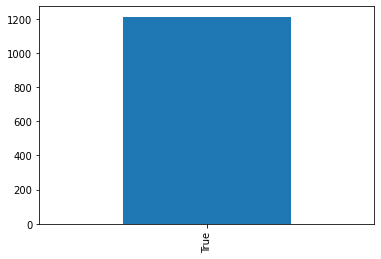

In [5]:
df[HANDHELD].value_counts().plot(kind="bar");


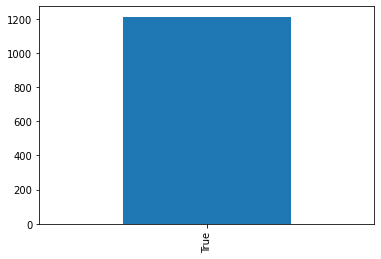

In [6]:
df[ONLINE].value_counts().plot(kind="bar");


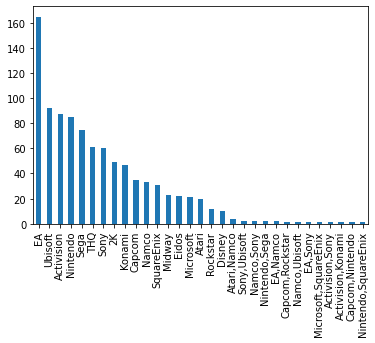

In [7]:
df[PUBLISHERS].value_counts().plot(kind="bar");


In [37]:
# Feature importance analysis
from sklearn import tree
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import ExtraTreesClassifier

# split features and target and encode categorial features
features = [name for name in df.axes[1] if name != "Metadata.Publishers"]
categorical_features = ["Title", "Metadata.Genres", "Release.Console", "Release.Rating"]
encoder = OrdinalEncoder()
encoder.fit(df[categorical_features])
df[categorical_features] = encoder.transform(df[categorical_features])

# Perform feature importance analysis using ExtraTrees
model = ExtraTreesClassifier(n_estimators=10)
model.fit(df[features], df["Metadata.Publishers"].replace(numpy.nan, "Unknown"))

# Print resulting feature importance coefficients
for i in range(len(features)):
    print(features[i], model.feature_importances_[i])


Title 0.06939926336226261
Features.Handheld? 0.0
Features.Max Players 0.026446536967201544
Features.Multiplatform? 0.0
Features.Online? 0.0
Metadata.Genres 0.05459475126603349
Metadata.Licensed? 0.0
Metadata.Sequel? 0.0
Metrics.Review Score 0.05927693418921761
Metrics.Sales 0.06229603288980148
Metrics.Used Price 0.05271078741807326
Release.Console 0.03908889619056699
Release.Rating 0.034464206380549686
Release.Re-release? 0.0
Release.Year 0.04005307522570152
Length.All PlayStyles.Average 0.032048729426896336
Length.All PlayStyles.Leisure 0.03435177319569734
Length.All PlayStyles.Median 0.02902743240550239
Length.All PlayStyles.Polled 0.03567367062233284
Length.All PlayStyles.Rushed 0.030550740480711595
Length.Completionists.Average 0.02331057047629797
Length.Completionists.Leisure 0.023786805544437926
Length.Completionists.Median 0.02713640413606767
Length.Completionists.Polled 0.024541084712860987
Length.Completionists.Rushed 0.026392896982217074
Length.Main + Extras.Average 0.0224507

<hr>

## 3. Classification (up to 7/8 points)
In this part of the tutorial you are requested to perform all the necessary steps required in order to design a full fledged classification task on the <b>Metrics.Review Score</b>.

You are requested to perform the following steps having in mind the following: 

1) the dataset must be properly splitted to perform crossvalidation during model selection/hyper parameter tuning and to test during the evaluation step 

2) features must be properly encoded

3) the target feature can be dicretized <b>(number of classes must be greater than 5)</b> in order to simplify the problem;

4) for model selection you are requested to consider: 
    - Decision Trees
    - Support Vector Machines;
    - An ensamble methodology;
    - MLPNs.
5) during model selection hyper-parameter tuning must be performed and discussed;

6) class imbalancing must be addressed (when appropriate);

7) remember to apply standardizion and normalization when appropriate;

8) provide a discussion of model selection where you describe the differences in terms of performance and explains the root causes;

9) describe the measure adopted for the evaluation and discuss the results;

#### 3.1 Preprocessing (up to 2/8 points)
Write the necessary code to perfrom an adequate prepocessing, <b>REMEMBER to describe with your own words each step. Perfectly working code with no comments and discussion correpsonds to 0 POINTS</b>

In [38]:
# Re-import and load data to not re-run every cell
import pandas, numpy

df = pandas.read_csv("video_games.csv")


# Remove features deemed useless in the feature importance analysis step
# Some features contain the same value for all rows. Unsurprisingly they add no predicting power, therefore we remove them.
features_names = [name for name in df.axes[1] if name != "Metadata.Publishers"]
useless_features = ["Features.Handheld?", "Features.Multiplatform?", "Features.Online?", "Metadata.Licensed?", "Metadata.Sequel?", "Release.Re-release?"]
features_names = [name for name in features_names if name not in useless_features]

# Split target from the features: we want to predict which is the publisher of the game based on our data.
features = df[features_names]
target = df["Metadata.Publishers"]

# Riempi valori mancanti (in publishers ci sono molti nan) vedi sklearn.impute.SimpleImputer
# (Qualora volessimo scegliere un target diverso, per discretizzare il target vedi KNN)
# Standardizzare i valori (vedi sklearn.preprocessing.MinMaxScaler() vedi pre-processing_3)


# Split data for training and testing, so we can later evaluate our results
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.4, random_state=0)

# Encode categorical features
from sklearn.preprocessing import OrdinalEncoder
categorical_features = ["Title", "Metadata.Genres", "Release.Console", "Release.Rating"]
encoder = OrdinalEncoder()
encoder.fit(features[categorical_features])
features[categorical_features] = encoder.transform(features[categorical_features])


#### 3.2 Model Selection  (up to 3/8 points)
Write the necessary code to perfrom an adequate model selection. tips: for some models you may need to perform additional preprocessing steps (encoding, normalization, feature selection, class balancement, ...).
<b>REMEMBER to describe with your own words each step. Perfectly working code with no comments and discussion correpsonds to 0 POINTS</b>

#### 3.3 Evaluation (up to 2/8 points)
Write the necessary code to perform an adequate model evaluation of the selected model. Confusion matrix and classsification reports are welcome. 
<b>REMEMBER to describe with your own words each step. Perfectly working code with no comments and no discussion correpsonds to 0 POINTS</b>

### 4. Summary
Provide a summary discussion of your solution <b>(at least 500 words)</b>.

<b>This is a mandatory step</b>

write here <b>your own</b> summary dicussion (use at least 500 words)